**Projet Informatique S2 - Déclin démographique**

Dans le cadre du projet d'étude du déclin démographique et vieillissement de la population au sein des pays de l’OCDE, nous sommes amenés à produire des cartes statiques au niveau TL3 de la France et du Japon. Voici ci dessous un résumé de nos découvertes dans la maîtrise des outils geopandas, shapely,...


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

**Commencons par la France, niveau régional (TL2) puis départemental (TL3)**

In [2]:
boundaries_reg=pd.read_json('tl2_fr.json')

#Fichier sencé contenir les frontières de toute les régions de France (TL2)

#Le fichier .json est un pas très exploitable directement, on extrait les
#frontières 
Names_reg=[]#contient le nom de la région
Id_reg=[]#contient l'id de la région
G_reg=[]#contient un Polygon ou MultiPolygon correspondant à la région
for i in boundaries_reg['features']:
    Names_reg.append(i['properties']['libgeo'])
    Id_reg.append(i['properties']['reg'])

    if i['geometry']['type']=='Polygon':

        p=i['geometry']['coordinates']
        G_reg.append(Polygon(p[0]))
    else:
        mp=i['geometry']['coordinates']
        s=[Polygon(p[0]) for p in mp]
        G_reg.append(MultiPolygon(s))

        
#Pour coller aux dataframes données par L'OCDE, on fait en sorte que 
#les nom de régions soient EXACTEMENT les mêmes
Names_reg[6]='Nouvelle-Aquitaine'
Names_reg[2]='Provence-Alpes-Côte d’Azur'
Names_reg[3]='Grand Est'
Names_reg[7]='Centre - Val de Loire'

geometry_reg=pd.DataFrame(Names_reg,columns=['Région'],index=np.arange(len(Names_reg)))
geometry_reg['Id']=Id_reg





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


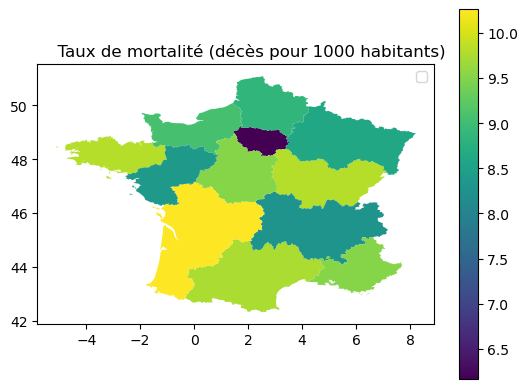

In [3]:
data_france_reg=pd.read_csv('data_tl2_fr.csv',usecols=['REG_ID', 'Région', 
       'Indicateur', 'SEX', 'Genre', 'POS','Année','Value'])
#Dataframe extraite du site de l'OCDE au niveau TL2 en France


indi=data_france_reg['Indicateur'][0]#indicateur choisi

data_france_reg=data_france_reg[(data_france_reg.Indicateur==indi) & (data_france_reg.Année==2005)&(data_france_reg.SEX=='T')]
#Je veux un indicateur en 2005 pour les hommes ET les femmes (il existe des données différenciées)
R=[]
for i in data_france_reg['Région']:
    p=geometry_reg[geometry_reg['Région']==i].index.values[0]
    R.append(G_reg[p])
gpd=geopandas.GeoDataFrame(data_france_reg,geometry=R)
gpd.plot("Value",legend=True)
plt.title(indi)
plt.legend()
plt.show()


In [4]:
boundaries_dep=pd.read_json('tl3_fr.json')
Names_dep=[]
Id_dep=[]
G_dep=[]
for i in boundaries_dep['features'] :
    Names_dep.append(i['properties']['nom'])
    Id_dep.append(i['properties']['code'])

    if i['geometry']['type']=='Polygon' :
        coords_dep = i['geometry']['coordinates'][0]
        G_dep.append(Polygon(coords_dep))
       

    else :
        coords_dep = [Polygon(p[0]) for p in i['geometry']['coordinates']]
        G_dep.append(MultiPolygon(coords_dep))
geometry_dep = pd.DataFrame(Names_dep, columns=['Departements'])
geometry_dep['Id_dep']=Id_dep


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


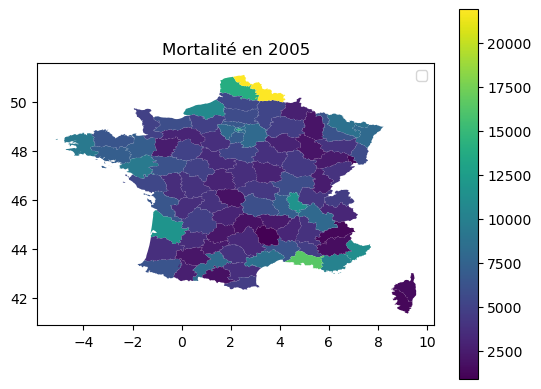

In [8]:
data_france_dep=pd.read_csv('data_tl3_fr.csv',usecols=['TL','REG_ID', 'Région', 
       'Indicateur', 'SEX', 'Genre', 'POS','Année','Value'])
data_france_dep=data_france_dep[(data_france_dep.TL==3)&(data_france_dep.Année==2005)]
data_france_dep=data_france_dep.reset_index(drop=True)

R=[]
for i in data_france_dep['Région']:
    p=geometry_dep[geometry_dep['Departements']==i].index.values[0]
    R.append(G_dep[p])
gpd=geopandas.GeoDataFrame(data_france_dep,geometry=R)
gpd.plot("Value",legend=True)
plt.title('Mortalité en 2005')
plt.legend()
plt.show()

**Maintenant le Japon**

In [9]:
#Même idée : extraction des frontières TL3

boundaries_jpan=pd.read_json('tl3_jpan.json')


Names=[]
G=[]
for i in boundaries_jpan['features']:
    Names.append(i['properties']['name'])

    if i['geometry']['type']=='Polygon':

        p=i['geometry']['coordinates']
        G.append(Polygon(p[0]))
    else:
        mp=i['geometry']['coordinates']
        s=[Polygon(p[0]) for p in mp]
        G.append(MultiPolygon(s))

geometry_jpan=pd.DataFrame(Names,columns=['Région'],index=np.arange(len(Names)))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


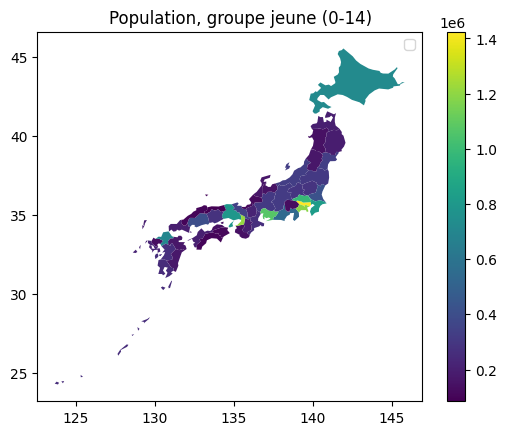

In [26]:
df=pd.read_csv('data_tl3_jpan.csv',usecols=['TL','REG_ID','Région','Indicateur','SEX','Genre','TIME','Année','Value'])
indi=df['Indicateur'][63499]
df=df[(df.TL==3)&(df.Année==2005)&(df.SEX=='T')&(df.Indicateur==indi)].reset_index(drop=True)


R=[]
for i in df['Région']:
    p=geometry_jpan[geometry_jpan['Région']==i].index.values[0]
    R.append(G[p])
gpd=geopandas.GeoDataFrame(df,geometry=R)
gpd.plot("Value",legend=True)
plt.title(indi)
plt.legend()
plt.show()

